In [1]:
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Polygon
import time
import requests
import json

In [2]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 '
                  '(KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36'}

html = requests.get('https://data.jianshukeji.com/geochina/cities.json', headers=headers)
text = html.text

In [8]:
cities = json.loads(text)

In [4]:
with open('中国主要城市经纬度数据.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(cities))

19.976268529891968


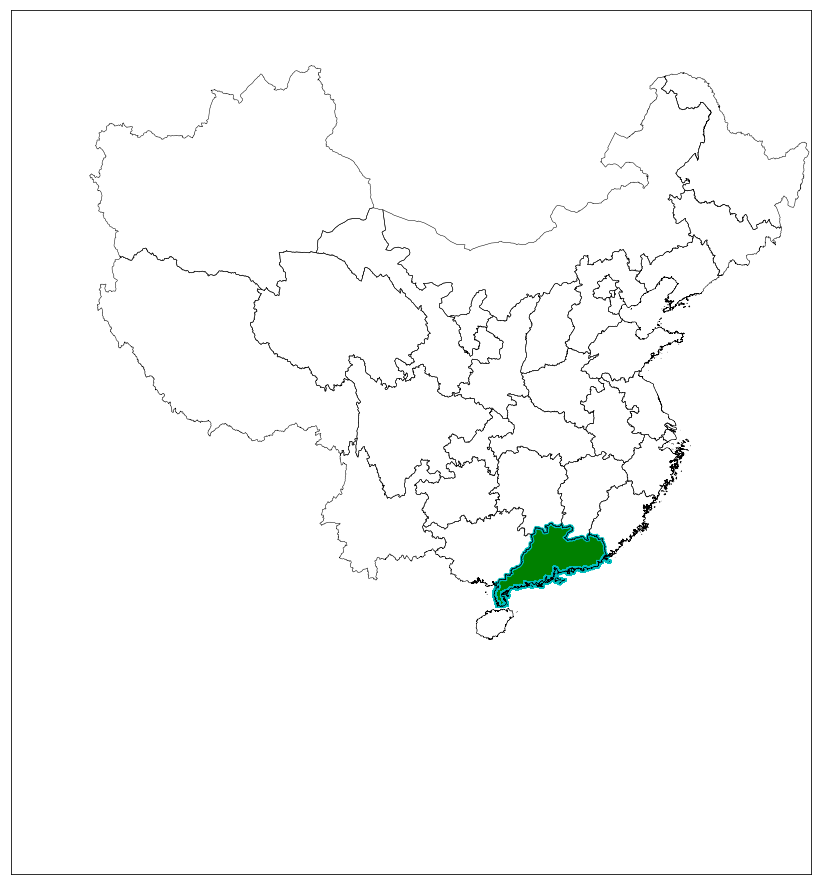

In [37]:
s = time.time()

fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=80.33, 
              llcrnrlat=3.01, 
              urcrnrlon=138.16, 
              urcrnrlat=56.123,
             resolution='h', projection='cass', lat_0 = 42.5,lon_0=120,ax=ax1)

shp_info = m.readshapefile("china_shapefile/gadm36_CHN_shp/gadm36_CHN_1", 'states',drawbounds=True)

for info, shp in zip(m.states_info, m.states):
    proid = info['NAME_1']
    if proid == 'Guangdong':
        poly = Polygon(shp,facecolor='g',edgecolor='c', lw=3) # 绘制广东省区域
        ax1.add_patch(poly)

#m.shadedrelief() # 绘制阴暗的浮雕图

#m.drawcoastlines()

print(time.time() - s)
plt.show()

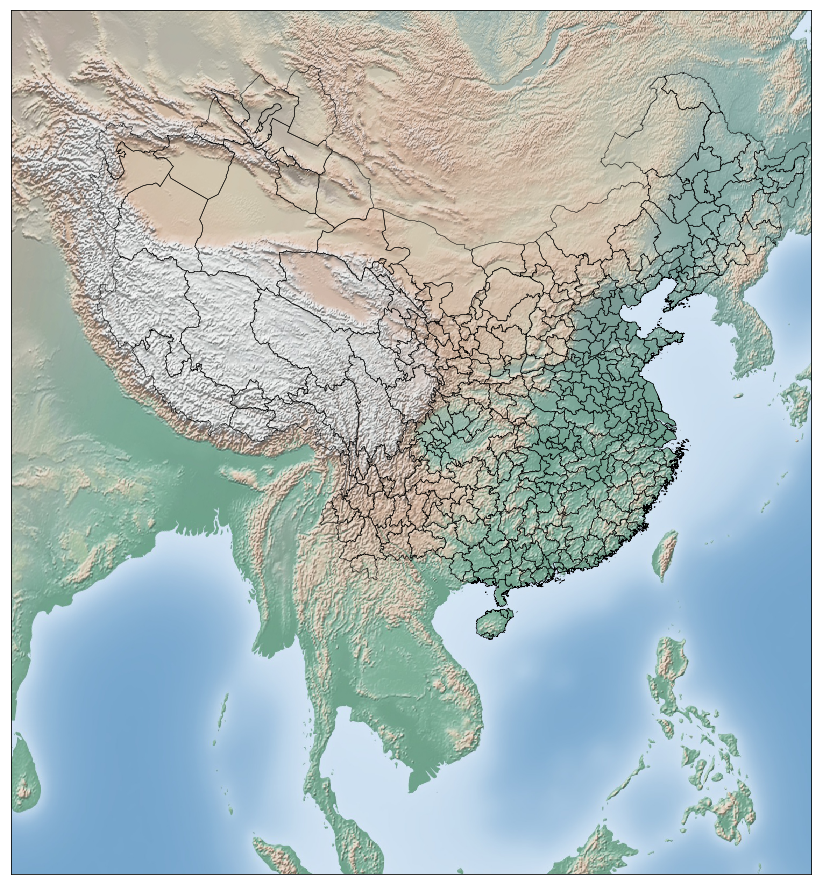

In [40]:
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=80.33, 
              llcrnrlat=3.01, 
              urcrnrlon=138.16, 
              urcrnrlat=56.123,
             resolution='h', projection='cass', lat_0 = 42.5,lon_0=120,ax=ax1)

shp_info = m.readshapefile("china_shapefile/gadm36_CHN_shp/gadm36_CHN_2", 'states',drawbounds=True)
m.shadedrelief()

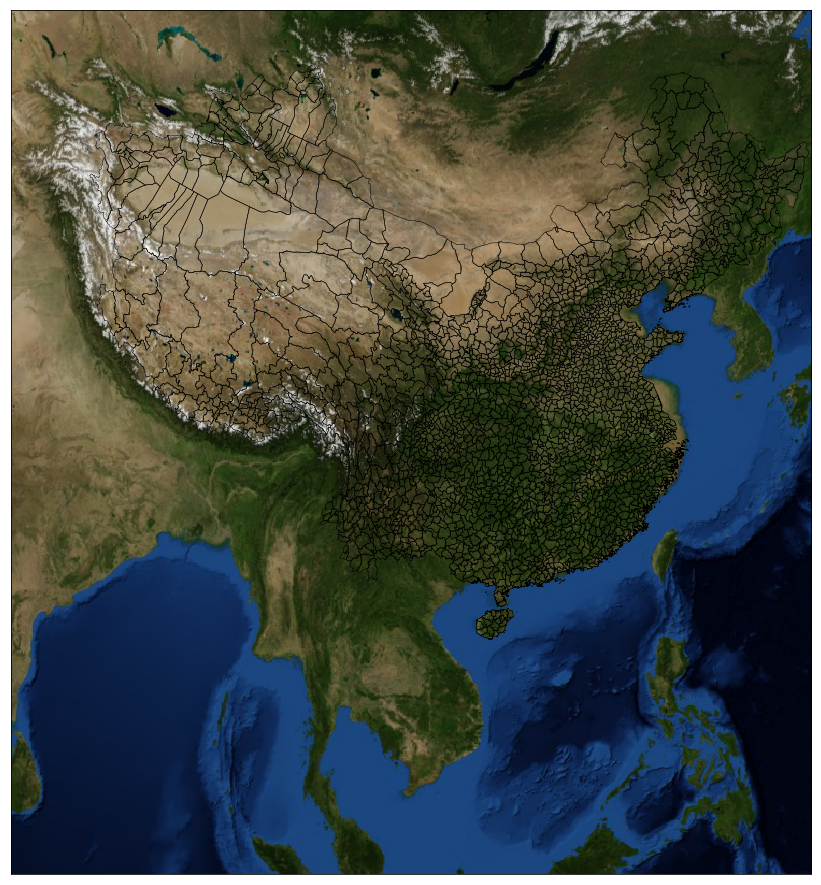

In [3]:
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=80.33, 
              llcrnrlat=3.01, 
              urcrnrlon=138.16, 
              urcrnrlat=56.123,
             resolution='h', projection='cass', lat_0 = 42.5,lon_0=120,ax=ax1)

shp_info = m.readshapefile("china_shapefile/gadm36_CHN_shp/gadm36_CHN_3", 'states',drawbounds=True)
m.bluemarble()

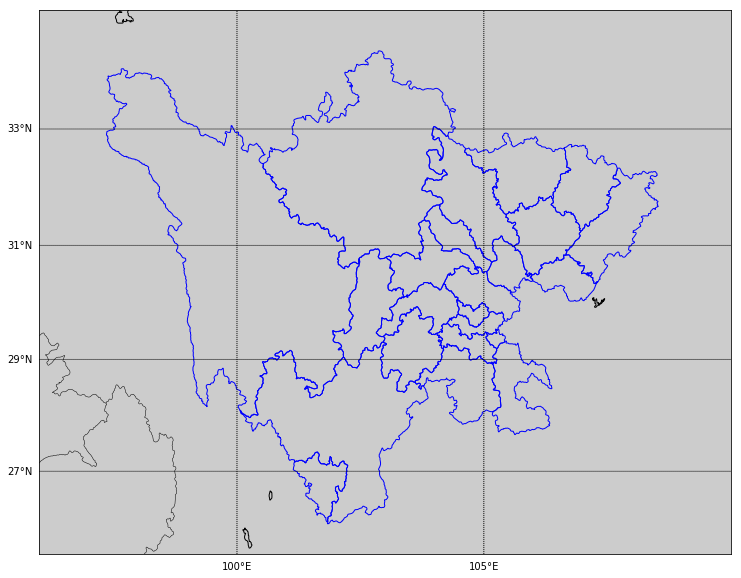

In [103]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
bmap = Basemap(llcrnrlon=96,llcrnrlat=25.5,urcrnrlon=110,urcrnrlat=35, resolution='f',
            projection='merc',lat_1=33,lat_2=45,lon_0=120, ax=ax1)
shp_info = bmap.readshapefile('china_shapefile/gadm36_CHN_shp/gadm36_CHN_2','states',drawbounds=False)

for info, shp in zip(bmap.states_info, bmap.states):
    proid = info['NAME_1']
    if proid == 'Sichuan':
        poly = Polygon(shp, fill=False, edgecolor='b', lw=1)
        ax1.add_patch(poly)
    
bmap.drawcoastlines()
bmap.drawcountries()
bmap.drawparallels(np.arange(27,35,2),labels=[1,0,0,0])
bmap.drawmeridians(np.arange(95,110,5),labels=[0,0,0,1])
bmap.drawlsmask()
plt.show()

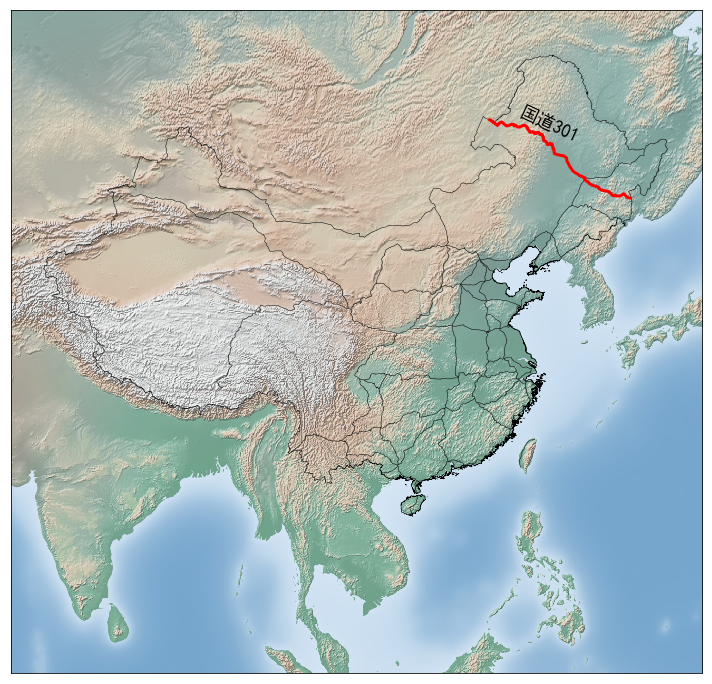

In [15]:
from matplotlib.lines import Line2D
from matplotlib.text import Text

plt.rcParams['font.sans-serif']=['SimHei']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([.1, .1, .8, .8])

m = Basemap(llcrnrlon=70.33, 
              llcrnrlat=3.01, 
              urcrnrlon=138.16, 
              urcrnrlat=56.123, 
            resolution='h', projection='merc', lat_0 = 45.5,lon_0=110,ax=ax
           )

m.shadedrelief()
shp_info = m.readshapefile('Roads/roa_4m', 'road')

#x1, y1 = zip(*m.road[100])
pivot = True
for info, shp in zip(m.road_info, m.road):
    if info['ROA_4M_ID'] == 301:
        x, y = zip(*shp)
        ax.add_line(Line2D(x, y, linewidth=3, color='r'))
        if pivot:
            ax.text(x[0]*1.05, y[0]*1.01, '国道301', fontsize=18, rotation=-25)
            pivot=False
#ax.add_line(Line2D(x1, y1, linewidth=5))
_ = m.readshapefile('china_shapefile/gadm36_CHN_shp/gadm36_CHN_0', 'china')

In [11]:
from matplotlib.text import Text

Text?

Init signature: Text(x=0, y=0, text='', color=None, verticalalignment='baseline', horizontalalignment='left', multialignment=None, fontproperties=None, rotation=None, linespacing=None, rotation_mode=None, usetex=None, wrap=False, **kwargs)
Docstring:      Handle storing and drawing of text in window or data coordinates.
Init docstring:
Create a :class:`~matplotlib.text.Text` instance at *x*, *y*
with string *text*.

Valid kwargs are
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: bool 
  backgroundcolor: any matplotlib color 
  bbox: FancyBboxPatch prop dict 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: bool 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color: any matplotlib color 
  contains: a callable function 
  family or fontfamil

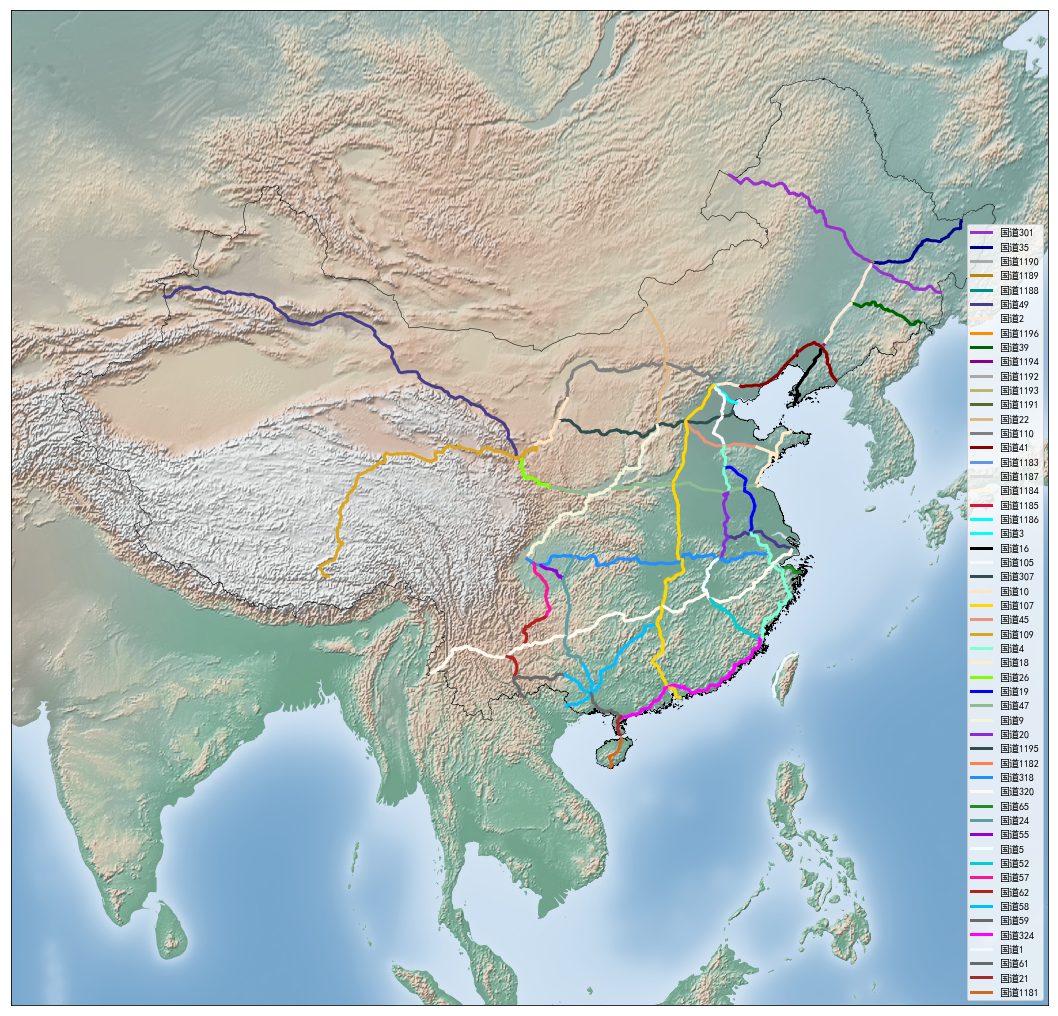

In [69]:
from matplotlib.lines import Line2D
from matplotlib.text import Text

plt.rcParams['font.sans-serif']=['SimHei']

fig = plt.figure(figsize=(18, 18))
ax = fig.add_axes([.1, .1, .8, .8])

m = Basemap(llcrnrlon=70.33, 
              llcrnrlat=3.01, 
              urcrnrlon=138.16, 
              urcrnrlat=56.123, 
            resolution='h', projection='merc', lat_0 = 45.5,lon_0=110,ax=ax
           )

m.shadedrelief()
shp_info = m.readshapefile('Roads/roa_4m', 'road')

_ = m.readshapefile('china_shapefile/gadm36_CHN_shp/gadm36_CHN_0', 'china')


colormap = {num: color for num, color in zip(nroads, mc.CSS4_COLORS.values())}
legendmap = {num: True for num in nroads}
for info, shp in zip(m.road_info, m.road):
    num = info['ROA_4M_ID']
    x, y = zip(*shp)
    if legendmap[num]:
        ax.add_line(Line2D(x, y, linewidth=3, 
                           c=colormap[num], 
                           label='国道%s' % str(num)
                          )
                   )
        legendmap[num] = False
    else:
        ax.add_line(Line2D(x, y, linewidth=3, 
                   c=colormap[num], 
                          )
                   )
ax.legend(loc='lower right')

In [62]:
ax.legend?

Signature: ax.legend(*args, **kwargs)
Docstring:
Places a legend on the axes.

Call signatures::

    legend()
    legend(labels)
    legend(handles, labels)

The call signatures correspond to three different ways how to use
this method.

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    line, = ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line.set_label('Label via method')
    line, = ax.plot([1, 2, 3])
    ax.legend()

Specific lines can be excluded from the automatic legend element
selection by defining a label starting with an underscore.
This is default for all artists, so calling `Axes.legend` without
any arguments and without setting the labels manually will 

In [36]:
{num: color for num, color in zip(nroads, mc.CSS4_COLORS.values())}

{1: '#F0F8FF',
 2: '#FAEBD7',
 3: '#00FFFF',
 4: '#7FFFD4',
 5: '#F0FFFF',
 9: '#F5F5DC',
 10: '#FFE4C4',
 16: '#000000',
 18: '#FFEBCD',
 19: '#0000FF',
 20: '#8A2BE2',
 21: '#A52A2A',
 22: '#DEB887',
 24: '#5F9EA0',
 26: '#7FFF00',
 1181: '#D2691E',
 1182: '#FF7F50',
 1183: '#6495ED',
 1184: '#FFF8DC',
 1185: '#DC143C',
 1186: '#00FFFF',
 35: '#00008B',
 1188: '#008B8B',
 1189: '#B8860B',
 1190: '#A9A9A9',
 39: '#006400',
 1192: '#A9A9A9',
 1193: '#BDB76B',
 1194: '#8B008B',
 1191: '#556B2F',
 1196: '#FF8C00',
 301: '#9932CC',
 41: '#8B0000',
 45: '#E9967A',
 47: '#8FBC8F',
 49: '#483D8B',
 1195: '#2F4F4F',
 307: '#2F4F4F',
 52: '#00CED1',
 55: '#9400D3',
 57: '#FF1493',
 58: '#00BFFF',
 59: '#696969',
 61: '#696969',
 318: '#1E90FF',
 62: '#B22222',
 320: '#FFFAF0',
 65: '#228B22',
 324: '#FF00FF',
 1187: '#DCDCDC',
 105: '#F8F8FF',
 107: '#FFD700',
 109: '#DAA520',
 110: '#808080'}

In [32]:
c = mc.CSS4_COLORS
for i, color in zip(range(len(c)), c.values()):
    print(i, color)

0 #F0F8FF
1 #FAEBD7
2 #00FFFF
3 #7FFFD4
4 #F0FFFF
5 #F5F5DC
6 #FFE4C4
7 #000000
8 #FFEBCD
9 #0000FF
10 #8A2BE2
11 #A52A2A
12 #DEB887
13 #5F9EA0
14 #7FFF00
15 #D2691E
16 #FF7F50
17 #6495ED
18 #FFF8DC
19 #DC143C
20 #00FFFF
21 #00008B
22 #008B8B
23 #B8860B
24 #A9A9A9
25 #006400
26 #A9A9A9
27 #BDB76B
28 #8B008B
29 #556B2F
30 #FF8C00
31 #9932CC
32 #8B0000
33 #E9967A
34 #8FBC8F
35 #483D8B
36 #2F4F4F
37 #2F4F4F
38 #00CED1
39 #9400D3
40 #FF1493
41 #00BFFF
42 #696969
43 #696969
44 #1E90FF
45 #B22222
46 #FFFAF0
47 #228B22
48 #FF00FF
49 #DCDCDC
50 #F8F8FF
51 #FFD700
52 #DAA520
53 #808080
54 #008000
55 #ADFF2F
56 #808080
57 #F0FFF0
58 #FF69B4
59 #CD5C5C
60 #4B0082
61 #FFFFF0
62 #F0E68C
63 #E6E6FA
64 #FFF0F5
65 #7CFC00
66 #FFFACD
67 #ADD8E6
68 #F08080
69 #E0FFFF
70 #FAFAD2
71 #D3D3D3
72 #90EE90
73 #D3D3D3
74 #FFB6C1
75 #FFA07A
76 #20B2AA
77 #87CEFA
78 #778899
79 #778899
80 #B0C4DE
81 #FFFFE0
82 #00FF00
83 #32CD32
84 #FAF0E6
85 #FF00FF
86 #800000
87 #66CDAA
88 #0000CD
89 #BA55D3
90 #9370DB
91 #3CB37

In [22]:
nroads = []
for i in m.road_info:
    nroads.append(i['ROA_4M_ID'])
nroads = set(nroads)

In [17]:
m.road_info

[{'FNODE_': 2,
  'TNODE_': 1,
  'LPOLY_': 1,
  'RPOLY_': 1,
  'LENGTH': 0.347,
  'ROA_4M_': 1,
  'ROA_4M_ID': 301,
  'GBCODE': 42220,
  'RINGNUM': 1,
  'SHAPENUM': 1},
 {'FNODE_': 3,
  'TNODE_': 2,
  'LPOLY_': 1,
  'RPOLY_': 1,
  'LENGTH': 5.52,
  'ROA_4M_': 2,
  'ROA_4M_ID': 301,
  'GBCODE': 42220,
  'RINGNUM': 1,
  'SHAPENUM': 2},
 {'FNODE_': 4,
  'TNODE_': 5,
  'LPOLY_': 1,
  'RPOLY_': 1,
  'LENGTH': 2.834,
  'ROA_4M_': 3,
  'ROA_4M_ID': 35,
  'GBCODE': 42220,
  'RINGNUM': 1,
  'SHAPENUM': 3},
 {'FNODE_': 6,
  'TNODE_': 3,
  'LPOLY_': 1,
  'RPOLY_': 1,
  'LENGTH': 6.098,
  'ROA_4M_': 4,
  'ROA_4M_ID': 301,
  'GBCODE': 42220,
  'RINGNUM': 1,
  'SHAPENUM': 4},
 {'FNODE_': 8,
  'TNODE_': 7,
  'LPOLY_': 1,
  'RPOLY_': 1,
  'LENGTH': 0.502,
  'ROA_4M_': 5,
  'ROA_4M_ID': 35,
  'GBCODE': 42220,
  'RINGNUM': 1,
  'SHAPENUM': 5},
 {'FNODE_': 5,
  'TNODE_': 8,
  'LPOLY_': 1,
  'RPOLY_': 1,
  'LENGTH': 3.698,
  'ROA_4M_': 6,
  'ROA_4M_ID': 35,
  'GBCODE': 42220,
  'RINGNUM': 1,
  'SHAPENUM': 

# 反向获取某点的经纬度：
`python
bmap(x, y, inverse=True)
`

In [206]:
m(5000000,5000000, inverse=True)

(115.29610146974039, 43.18929770935646)

In [221]:
re = []
la, lon = m(x, y, inverse=True)
for i, j in zip(la, lon):
    re.append((i, j))
re

[(131.16250610351562, 44.39156341552733),
 (131.14321899414062, 44.38943099975586),
 (131.11366271972656, 44.39250183105469),
 (131.10401916503906, 44.39367675781251),
 (131.07716369628906, 44.39694595336915),
 (131.03187561035156, 44.40028762817383),
 (130.98855590820312, 44.40983581542968),
 (130.94338989257812, 44.41689300537111),
 (130.90353393554688, 44.42634582519529),
 (130.86724853515625, 44.43822860717772),
 (130.8643035888672, 44.43930816650391),
 (130.82061767578125, 44.45527267456055),
 (130.795166015625, 44.479473114013686),
 (130.76588439941406, 44.49370956420899),
 (130.74362182617188, 44.509082794189446),
 (130.72134399414062, 44.52444839477539),
 (130.6956329345703, 44.5423698425293),
 (130.6717987060547, 44.565261840820305),
 (130.65138244628906, 44.58559417724608),
 (130.62582397460938, 44.611003875732415),
 (130.60519409179688, 44.62507247924804),
 (130.58470153808594, 44.644142150878906),
 (130.56768798828125, 44.66315841674803),
 (130.5469512939453, 44.67471313476

In [193]:
import folium

map_osm = folium.Map(location=[35,110],zoom_start=5)

In [163]:
m.road_info[0].keys()

dict_keys(['FNODE_', 'TNODE_', 'LPOLY_', 'RPOLY_', 'LENGTH', 'ROA_4M_', 'ROA_4M_ID', 'GBCODE', 'RINGNUM', 'SHAPENUM'])

In [154]:
y[0]

5881763.782056388

In [155]:
m.road[1][0]

(5780330.0752304895, 5881763.782056388)

In [253]:
dataset = np.random.randn(5,500)
for i in range(5):
    dataset[i] = dataset[i]*(i+1)+(i+1)*10

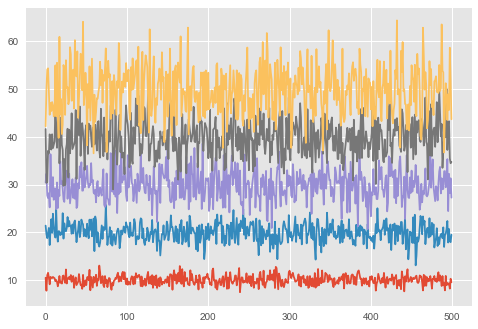

In [270]:
plt.style.use('ggplot')
plt.plot(dataset.T)

In [247]:
t = np.random.randn(50000)*100

In [260]:
import matplotlib.colors as mc

print(dir(mc))

['BASE_COLORS', 'BoundaryNorm', 'CSS4_COLORS', 'ColorConverter', 'Colormap', 'LightSource', 'LinearSegmentedColormap', 'ListedColormap', 'LogNorm', 'NoNorm', 'Normalize', 'PowerNorm', 'Sized', 'SymLogNorm', 'TABLEAU_COLORS', 'XKCD_COLORS', '_ColorMapping', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_colors_full_map', '_is_nth_color', '_sanitize_extrema', '_to_rgba_no_colorcycle', '_vector_dot', '_vector_magnitude', 'absolute_import', 'cbook', 'cnames', 'colorConverter', 'division', 'from_levels_and_colors', 'get_named_colors_mapping', 'hex2color', 'hexColorPattern', 'hsv_to_rgb', 'is_color_like', 'itertools', 'makeMappingArray', 'np', 'print_function', 're', 'rgb2hex', 'rgb_to_hsv', 'same_color', 'six', 'to_hex', 'to_rgb', 'to_rgba', 'to_rgba_array', 'unicode_literals', 'warnings', 'zip']


In [276]:
mc.Colormap?

Init signature: mc.Colormap(name, N=256)
Docstring:     
Baseclass for all scalar to RGBA mappings.

Typically Colormap instances are used to convert data values (floats) from
the interval ``[0, 1]`` to the RGBA color that the respective Colormap
represents. For scaling of data into the ``[0, 1]`` interval see
:class:`matplotlib.colors.Normalize`. It is worth noting that
:class:`matplotlib.cm.ScalarMappable` subclasses make heavy use of this
``data->normalize->map-to-color`` processing chain.
Init docstring:
Parameters
----------
name : str
    The name of the colormap.
N : int
    The number of rgb quantization levels.
File:           c:\users\zw493\anaconda3\lib\site-packages\matplotlib\colors.py
Type:           type
